In [38]:
import cupy as np
import matplotlib.pyplot as plt
import h5py
from cupy.fft import irfft2, rfft2,fftfreq,fftshift

In [39]:
N = 128
Nf = N//2 + 1

In [41]:

Kx = Ky = fftfreq(N,1./N)
Ky = Ky[:Nf]
kx,ky = np.meshgrid(Kx,Ky,indexing="ij")
lap = -(kx**2 + ky**2)
invlap = np.where(lap == 0, 0, 1/lap)
k = (-lap)**0.5

In [45]:
w = np.load("/home/rajarshi.chattopadhyay/fluid/2DV_Codes/data/TG/N_128_Re_9.999999999999999e+29,dt_0.05/time_0.0/w.npy")

In [46]:
u = np.zeros((2,N,N))
u[0] = irfft2(1j*ky*invlap*w,(N,N))
u[1] = irfft2(-1j*kx*invlap*w,(N,N))
omg = irfft2(w,(N,N))


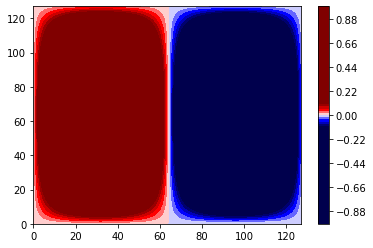

In [48]:
p1 = plt.contourf(omg.T.get(),100,cmap ="seismic",vmin =-0.1,vmax = 0.1)
plt.colorbar(p1,extend = "both")

In [13]:
omg_rms = np.sum(omg**2)**0.5/N

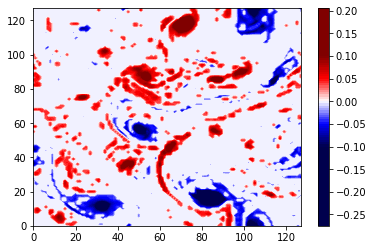

In [14]:
p1 = plt.contourf(((np.abs(omg)>omg_rms)*omg).get(),100,cmap ="seismic",vmin =-0.1,vmax = 0.1)
plt.colorbar(p1,extend = "both")

In [8]:
# for t in range(0,2010,20):
#     print(t,end='\r')
#     w = np.load(f"/home/rajarshi.chattopadhyay/fluid/2DV_Codes/data/N_128_Re_1e+28,dt_0.05/time_{t:.1f}/w.npy")

#     u = np.zeros((2,N,N))
#     u[0] = irfft2(1j*ky*invlap*w,(N,N))
#     u[1] = irfft2(-1j*kx*invlap*w,(N,N))
#     omg = irfft2(w,(N,N))
#     plt.figure(figsize=(8,6))
#     dat = np.clip(omg, -0.1,0.1)
#     p1 = plt.contourf(dat.get(),100,cmap ="seismic",vmin = -0.1,vmax = 0.1)
#     plt.colorbar(p1,extend = "both")
#     plt.savefig(f"/home/rajarshi.chattopadhyay/fluid/2DV_Codes/Plots/N_128_Re_1e+28,dt_0.05/time_{t:.1f}_w.png",dpi = 300)
#     plt.close()

In [15]:
A = np.zeros((2,2,N,N))
A[0,0] = irfft2(1j*kx*rfft2(u[0]),(N,N))
A[1,0] = irfft2(1j*kx*rfft2(u[1]),(N,N))
A[0,1] = irfft2(1j*ky*rfft2(u[0]),(N,N))
A[1,1] = irfft2(1j*ky*rfft2(u[1]),(N,N))

In [51]:
# Du = (A[:,0]*u[1] - A[:,1]*u[0])/(u[0]**2 + u[1]**2)**0.5
# Du.shape
# normDu = (Du[0]**2 + Du[1]**2)**0.5

In [74]:
# scalednormDu = (normDu - np.min(normDu))/(np.max(normDu) - np.min(normDu))
# np.min(scalednormDu),np.max(scalednormDu),np.std(scalednormDu)

(array(0.), array(1.), array(0.10242003))

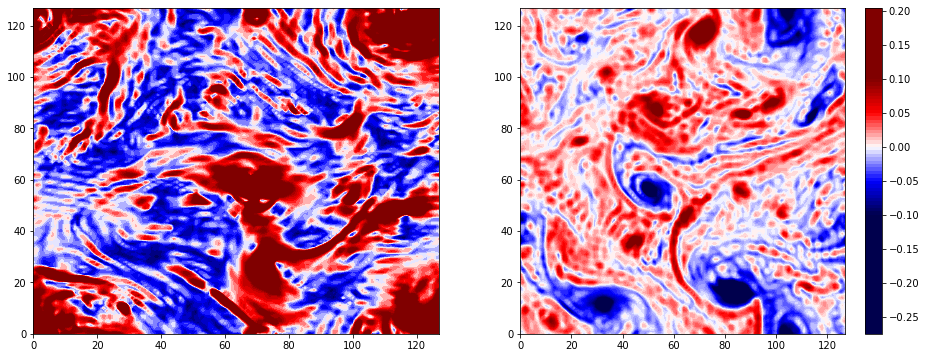

In [76]:
# plt.figure(figsize=(16,6))
# plt.subplot(1,2,1)
# plt.contourf(scalednormDu.get(),100,cmap = "seismic",vmin =0,vmax =0.2)
# plt.subplot(1,2,2)
# p1 = plt.contourf(omg.get(),100,cmap ="seismic",vmin =-0.1,vmax = 0.1)
# plt.colorbar(p1,extend = "both")

In [16]:
A2 = np.reshape(np.moveaxis(np.moveaxis(A.reshape(2,2,128**2),2,0)@np.moveaxis(A.reshape(2,2,128**2),2,0),0,2),(2,2,128,128))
Q = -0.5*(A2[0,0] + A2[1,1])

In [11]:
# s = 0
# for i in range(128):
#     for j in range(128):
#         s = s  + 1*np.allclose(A2[...,i,j] , np.matmul(A[...,i,j],A[...,i,j]))
# s/128**2

In [33]:
# masked_omg = np.where((Q>0) *(omg>2*np.std(omg[omg >0])), omg,np.nan)
masked_omg = np.where((Q>0.5*np.std(Q[Q>0])) *(omg>0), omg,np.nan)

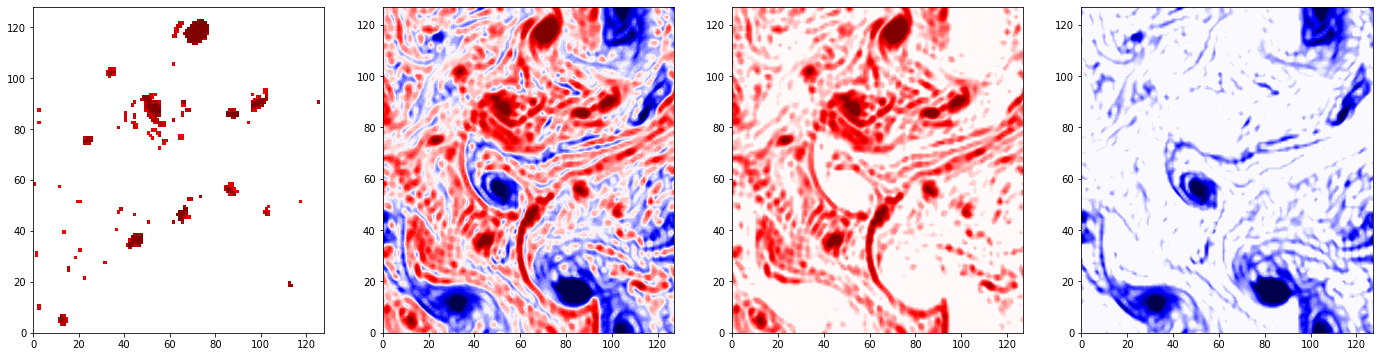

In [37]:
plt.figure(figsize = (24,6))
plt.subplot(1,4,1)
p1 = plt.pcolor(masked_omg.get(),cmap ="seismic",vmin = -0.1,vmax = 0.1)
# plt.colorbar(p1,extend = "both")
plt.subplot(1,4,2)
p1 = plt.contourf(omg.get(),100,cmap ="seismic",vmin =-0.1,vmax = 0.1)
# plt.colorbar(p1,extend = "both")
plt.subplot(1,4,3)
p1 = plt.contourf(((omg>0)*omg).get(),100,cmap ="seismic",vmin =-0.1,vmax = 0.1)
plt.subplot(1,4,4)
p1 = plt.contourf(((omg<0)*omg).get(),100,cmap ="seismic",vmin =-0.1,vmax = 0.1)

In [18]:
# np.savez_compressed(f"/home/rajarshi.chattopadhyay/fluid/2DV_Codes/data/N_128_Re_1e+28,dt_0.05/vel_{N}",field = u)
# np.savez_compressed(f"/home/rajarshi.chattopadhyay/fluid/2DV_Codes/data/N_128_Re_1e+28,dt_0.05/shear_{N}",shear = A)

In [52]:
for t in range(0,2010,20):
    print(t,end='\r')
    w = np.load(f"/home/rajarshi.chattopadhyay/fluid/2DV_Codes/data/TG/N_128_Re_9.999999999999999e+29,dt_0.05/time_{t:.1f}/w.npy")

    u = np.zeros((2,N,N))
    u[0] = irfft2(1j*ky*invlap*w,(N,N))
    u[1] = irfft2(-1j*kx*invlap*w,(N,N))
    omg = irfft2(w,(N,N))
    # A = np.zeros((2,2,N,N))
    # A[0,0] = irfft2(1j*kx*rfft2(u[0]),(N,N))
    # A[1,0] = irfft2(1j*kx*rfft2(u[1]),(N,N))
    # A[0,1] = irfft2(1j*ky*rfft2(u[0]),(N,N))
    # A[1,1] = irfft2(1j*ky*rfft2(u[1]),(N,N))
    # A2 = np.reshape(np.moveaxis(np.moveaxis(A.reshape(2,2,128**2),2,0)@np.moveaxis(A.reshape(2,2,128**2),2,0),0,2),(2,2,128,128))
    # Q = -0.5*(A2[0,0] + A2[1,1])
    # masked_omg_pos = np.where((Q>0.5*np.std(Q[(Q>0)])) *(omg>0), omg,np.nan)
    # masked_omg_neg = np.where((Q>0.5*np.std(Q[(Q>0)])) *(omg<0), omg,np.nan)
    # plt.figure(figsize=(16,6))
    # plt.subplot(1,2,1)
    p1 = plt.contourf(omg.T.get(),100,cmap ="seismic")#,vmin = -0.1,vmax = 0.1)
    plt.colorbar(p1,extend = "both")
    plt.savefig(f"/home/rajarshi.chattopadhyay/fluid/2DV_Codes/Plots/N_128_Re_1e+28,dt_0.05/time_{t:.1f}_w.png",dpi = 300)
    plt.clf()
    # plt.show()
    # plt.subplot(1,2,2)
    # p1 = plt.contourf(masked_omg_pos.get(),100,cmap ="seismic",vmin = -0.1,vmax = 0.1)
    # p1 = plt.contourf(masked_omg_neg.get(),100,cmap ="seismic",vmin = -0.1,vmax = 0.1)
    # # plt.colorbar(p1,extend = "both")
    
    # plt.savefig(f"/home/rajarshi.chattopadhyay/fluid/2DV_Codes/Plots/N_128_Re_1e+28,dt_0.05/time_{t:.1f}_omg_compared.png",dpi = 300)
    # # plt.show()
    # plt.close()

FileNotFoundError: [Errno 2] No such file or directory: '/home/rajarshi.chattopadhyay/fluid/2DV_Codes/data/TG/N_128_Re_9.999999999999999e+29,dt_0.05/time_1020.0/w.npy'

<Figure size 432x288 with 0 Axes>